In [ ]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv('Exp1.csv')

df_copy = df.copy()
df_copy.drop(['Run_ID', 'Experiment', 'Replica', 'Tool_ID', 'Group', 'Subgroup',
           'Condition', 'TCond',
           'Machined_length', 'Init_diameter', 'Final_diameter', 'CTime', 'R_measurement','Rsk','Rku','RSm','Rt','Fx','Fy','Fz','F','Rz'],axis=1, inplace=True)
print(df_copy.head())
print(df_copy.tail())

  Position    ap   vc  feed     Ra
0        a  0.25  350  0.07  0.391
1        a  0.25  350  0.07  0.359
2        a  0.25  350  0.07  0.421
3        a  0.25  350  0.07  0.450
4        a  0.25  350  0.07  0.360
    Position   ap   vc  feed     Ra
319        i  0.8  390   0.1  0.597
320        i  0.8  390   0.1  0.610
321        i  0.8  390   0.1  0.569
322        i  0.8  390   0.1  0.592
323        i  0.8  390   0.1  0.579


In [23]:
# Filtrowanie danych – tylko tam, gdzie w kolumnie 'position' jest 'a'
filtered_df = df_copy[    (df_copy["Position"] == "a") &
    (df_copy["ap"] == 0.25) &
    (df_copy["vc"] == 350) &
    (df_copy["feed"] == 0.07)]

# Ustawienie, by Pandas wyświetlał wszystkie wiersze (opcjonalnie)
pd.set_option('display.max_rows', None)

# Wyświetlenie tabeli
print(filtered_df)

  Position    ap   vc  feed     Ra
0        a  0.25  350  0.07  0.391
1        a  0.25  350  0.07  0.359
2        a  0.25  350  0.07  0.421
3        a  0.25  350  0.07  0.450
4        a  0.25  350  0.07  0.360
5        a  0.25  350  0.07  0.383


In [26]:
# Grupowanie po parametrach i uśrednianie Ra
aggregated_df = df_copy.groupby(["Position", "ap", "vc", "feed"], as_index=False)["Ra"].mean()

# Podgląd wyniku
print(aggregated_df)

   Position    ap   vc  feed        Ra
0         a  0.25  350  0.07  0.394000
1         a  0.25  350  0.10  1.047833
2         a  0.50  310  0.10  0.907000
3         a  0.80  310  0.10  0.963000
4         a  0.80  350  0.07  0.377500
5         b  0.25  350  0.13  1.454583
6         b  0.50  310  0.07  0.269167
7         b  0.50  310  0.13  1.123833
8         b  0.80  310  0.07  0.652000
9         b  0.80  350  0.13  1.420500
10        c  0.25  350  0.07  0.633167
11        c  0.25  350  0.10  0.638500
12        c  0.50  310  0.07  0.449833
13        c  0.50  310  0.13  1.105167
14        c  0.80  310  0.13  0.928500
15        c  0.80  350  0.10  0.825833
16        d  0.25  390  0.10  0.717333
17        d  0.25  390  0.13  1.263833
18        d  0.50  310  0.10  0.517500
19        d  0.50  350  0.13  0.968000
20        d  0.80  350  0.07  0.569667
21        d  0.80  390  0.07  0.438667
22        e  0.25  390  0.10  0.931167
23        e  0.25  390  0.13  1.102833
24        e  0.50  350  0

In [30]:
# Filtrowanie danych – tylko tam, gdzie w kolumnie 'position' jest 'a'
filtered_df_2 = aggregated_df[
    (aggregated_df["ap"] == 0.25)]

# Ustawienie, by Pandas wyświetlał wszystkie wiersze (opcjonalnie)
pd.set_option('display.max_rows', None)

# Wyświetlenie tabeli
print(filtered_df_2)

   Position    ap   vc  feed        Ra
0         a  0.25  350  0.07  0.394000
1         a  0.25  350  0.10  1.047833
5         b  0.25  350  0.13  1.454583
10        c  0.25  350  0.07  0.633167
11        c  0.25  350  0.10  0.638500
16        d  0.25  390  0.10  0.717333
17        d  0.25  390  0.13  1.263833
22        e  0.25  390  0.10  0.931167
23        e  0.25  390  0.13  1.102833
28        f  0.25  390  0.07  0.395833
33        g  0.25  310  0.10  0.772250
38        h  0.25  310  0.07  0.233833
39        h  0.25  310  0.13  1.167000
44        i  0.25  310  0.07  0.391333
45        i  0.25  310  0.13  0.829833


In [ ]:
# zamiana typu danych w kolumnach?
for col in columns_to_use:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [ ]:
# usuwanie?
df = df.dropna()

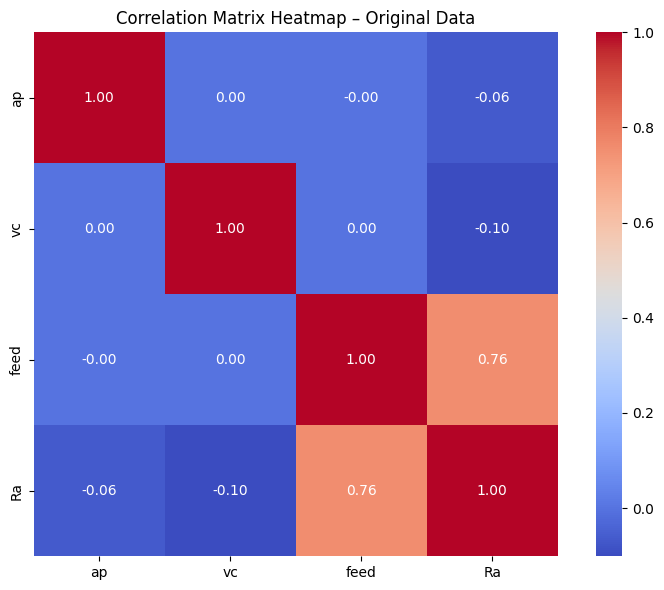

In [11]:
# correlation matrix on original (unscaled) data
corr_matrix_orig = df.corr()

# plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_orig, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap – Original Data")
plt.tight_layout()
plt.show()


In [ ]:
# wyszukiwanie outlierow
for col in ["ap", "vc", "feed", "Ra"]:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot – {col}")
    plt.show()

In [ ]:
# skalowanie danych?
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["ap", "vc", "feed"]])

In [ ]:
# nowy df
df_scaled = pd.DataFrame(X_scaled, columns=["ap_scaled", "vc_scaled", "feed_scaled"])
df_scaled["Ra"] = df["Ra"].values

In [ ]:
# zapis
conn = sqlite3.connect('SurfaceEXP1.db')  # dodaj rozszerzenie .db (zalecane)
df_scaled.to_sql('SurfaceEXP1', conn, if_exists='replace', index=False)
conn.close()